In [ ]:
!pip install kaggle

In [ ]:
%pip install --upgrade opendatasets

In [ ]:
!pip install py7zr

In [ ]:
import opendatasets as od

url = "https://www.kaggle.com/competitions/cifar-10/data"

od.download(url)

Skipping, found downloaded files in "./cifar-10" (use force=True to force download)


In [ ]:
!ls

cifar-10  sample_data  train


In [ ]:
from ast import increment_lineno
import os
import py7zr
import numpy as np
import pandas as pd
from PIL import Image
from matplotlib import  pyplot as pyplot
from fastai.vision.all import *
from matplotlib import image as mping
from sklearn.model_selection import train_test_split

In [ ]:
archive = py7zr.SevenZipFile('cifar-10/train.7z', mode='r')
archive.extractall()
archive.close()

In [ ]:
path = Path('train')

In [ ]:
path.ls()

(#50000) [Path('train/6356.png'),Path('train/42319.png'),Path('train/6270.png'),Path('train/33861.png'),Path('train/24169.png'),Path('train/16777.png'),Path('train/27459.png'),Path('train/48689.png'),Path('train/2768.png'),Path('train/30166.png'),Path('train/44196.png'),Path('train/15839.png'),Path('train/9266.png'),Path('train/18440.png'),Path('train/24896.png'),Path('train/28531.png'),Path('train/28584.png'),Path('train/8074.png'),Path('train/30898.png'),Path('train/29817.png')...]

In [ ]:
filenames = os.listdir('train')

In [ ]:
type(filenames)

list

In [ ]:
len(filenames)

50000

In [ ]:
print(filenames[0: 5])
print(filenames[-5: ])

['6356.png', '42319.png', '6270.png', '33861.png', '24169.png']
['18761.png', '46431.png', '13234.png', '732.png', '29212.png']


=> Label processing

In [ ]:
labels_df = pd.read_csv('cifar-10/trainLabels.csv')

In [ ]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
labels_df.shape

(50000, 2)

In [ ]:
labels_df[labels_df['id'] == 7796]

,id,label
7795,7796,frog


In [ ]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [ ]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [ ]:
labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [ ]:
labels_dictionary = {'automobile': 1, 'airplane': 2, 'bird': 3, 'cat': 4, 'deer': 5, 'dog': 6, 'frog': 7, 'horse': 8, 'ship': 9, 'truck': 10}
labels = [labels_dictionary[i] for i in labels_df['label']]

In [ ]:
print(labels[0: 5])
print(labels[-5:])

[7, 10, 10, 5, 1]
[3, 7, 10, 1, 1]


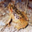

In [ ]:
img = Image.open('train/7796.png')
img

array([[[111, 110, 106],
        [109, 107, 104],
        [117, 116, 113],
        ...,
        [150, 150, 150],
        [148, 148, 148],
        [122, 122, 122]],

       [[105, 104, 100],
        [112, 111, 108],
        [112, 110, 109],
        ...,
        [146, 146, 146],
        [126, 126, 126],
        [117, 118, 117]],

       [[111, 110, 106],
        [106, 104, 101],
        [107, 106, 105],
        ...,
        [126, 126, 126],
        [122, 122, 122],
        [133, 133, 132]],

       ...,

       [[106, 110, 105],
        [108, 111, 107],
        [106, 109, 107],
        ...,
        [139, 140, 140],
        [146, 146, 146],
        [146, 145, 145]],

       [[104, 108, 103],
        [105, 109, 105],
        [ 99, 102, 100],
        ...,
        [143, 143, 143],
        [150, 149, 149],
        [138, 136, 135]],

       [[102, 104, 100],
        [100, 103,  99],
        [100, 103, 100],
        ...,
        [147, 146, 146],
        [142, 140, 140],
        [128, 126, 125]]], dtype=uint8)
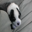

In [ ]:
import cv2
from google.colab.patches import  cv2_imshow

img1 = cv2.imread('train/45888.png')
img1

In [ ]:
labels_df.head(5)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
id_list = list(labels_df['id'])

In [ ]:
print(id_list[0: 5])
print(id_list[-5: ])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


In [ ]:
# convert images to numpy array

train_data_folder = 'train/'

data = []

for id in id_list:

  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [ ]:
type(data)

list

In [ ]:
len(data)

50000

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
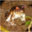

In [ ]:
data[0]

In [ ]:
# convet image list and label list to numpy

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


=> Train and Test split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
X_train_scaled

=> Bulilding the Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_class = 10

# setting up the layers of Neural Network

model = keras.Sequential([

    keras.layers.Flatten(input_shape = (32, 32, 3)),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(num_of_class, activation = 'softmax')

])


In [ ]:
# compile the neural Network

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
# training the neural network

model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs = 10)

=> ResNet50

In [ ]:
from multiprocessing.spawn import import_main_path
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers
from keras import models, layers

In [ ]:
convolution_base = ResNet50(weights = 'imagenet', include_top = False, input_shape = (256, 256, 3))
convolution_base.summary()

In [ ]:
num_of_class = 10
from keras import models, layers

model = models.Sequential()
model.add(layers.UpSampling2D(size=(2, 2)))
model.add(layers.UpSampling2D(size=(2, 2)))
model.add(layers.UpSampling2D(size=(2, 2)))

model.add(convolution_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_class, activation = 'softmax'))

In [ ]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy = ', accuracy)

In [ ]:
h = history

# plot the loss value

plt.plot(h.history['loss'], label = 'train loss')
plt.plot(h.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

# plot the accuracy value

plt.plot(h.history['accuracy'], label = 'train accuracy')
plt.plot(h.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.show()

